_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [1]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">Bus stop and pedestrian Analysis</div>

<div class="usecase-authors"><b>Authored by: </b>Akintomiwa Aremu James</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b> Python (pandas, matplotlib, geopandas), data analysis, machine learning and basic understanding of urban planning concept</div>
</div>

<div class="usecase-section-header">Scenario</div>

{As an urban planner tasked with improving pedestrian infrastructure and public transportation services, I need to understand the relationship between pedestrian activity peaks and the locations of bus stops within a given area. By analyzing these patterns, I aim to provide recommendations for optimizing bus stop locations, enhancing pedestrian facilities, and reducing congestion to promote a healthier urban environment..}

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:

- Data manipulation and analysis using pandas
- Advanced visualization techniques with matplotlib and geopandas for geospatial data analysis.
- Spatial analysis using geopandas to understand geographic relationships between pedestrian activity and bus stop locations.
- Implementation and interpretation of clustering algorithms for identifying spatial patterns in data.
- Integration of machine learning techniques (such as clustering) with spatial analysis to derive actionable insights for urban planning.
- Application of data-driven decision-making processes in urban planning contexts.ntexts.

<div class="usecase-section-header">A brief Walkthrough</div>

In urban planning, understanding the dynamics of pedestrian activity and public transportation infrastructure is crucial for creating sustainable and livable cities. This use case focuses on analyzing the correlation between pedestrian activity peaks and the locations of bus stops using Python libraries such as pandas, matplotlib, and geopandas. By examining these relationships, we aim to provide insights for urban planners to optimize infrastructure and enhance the urban environment.}




### writing out the dependencies

In [2]:
# Dependencies
import warnings
warnings.filterwarnings("ignore")

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import seaborn as sns
import folium
from folium.plugins import HeatMap
pd.set_option('display.max_columns', None)

### calling the three datasets-----
### pedestrian counts dataset-----
### bus stop datasets-----
### sensor reading datasets----


In [3]:
# **Preferred Method**: Export Endpoint

from io import StringIO

# https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/information/
dataset_id = 'pedestrian-counting-system-monthly-counts-per-hour'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
#apikey = api_key
dataset_id = dataset_id
format = 'csv'

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
   # 'api_key': apikey
}

# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    pedestrian_hour = pd.read_csv(StringIO(url_content), delimiter=';')
    print(pedestrian_hour.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')

       sensor_name                  timestamp  locationid  direction_1  \
299310    Col700_T  2023-06-11T00:00:00+00:00           9           72   
273077    SprFli_T  2024-01-16T19:00:00+00:00          75           30   
230538    Bou688_T  2023-08-22T21:00:00+00:00          58          794   
545967    FLDegC_T  2024-03-12T00:00:00+00:00          69          211   
41658     BouHbr_T  2023-07-06T06:00:00+00:00          10          275   
311686    BouBri_T  2023-06-03T18:00:00+00:00          57            2   
503749      ACMI_T  2024-02-27T12:00:00+00:00          72           10   
362060     Col12_T  2023-12-08T17:00:00+00:00          18          471   
90696         AG_T  2023-09-29T13:00:00+00:00          29           71   
340770      ACMI_T  2023-08-06T06:00:00+00:00          72          352   

        direction_2  total_of_directions                    location  
299310           93                  165  -37.81982992, 144.95102555  
273077           18                   48  -

In [4]:
###### Check number of records in dataset (dataset_id)
num_records = len(pedestrian_hour)
print(f'The dataset contains {num_records} records.')
     

The dataset contains 549976 records.


In [5]:
# View the pedestrian counts dataset
pedestrian_hour

,sensor_name,timestamp,locationid,direction_1,direction_2,total_of_directions,location
0,SprFli_T,2023-04-24T21:00:00+00:00,75,36,17,53,"-37.81515276, 144.97467661"
1,SprFli_T,2023-04-25T00:00:00+00:00,75,28,50,78,"-37.81515276, 144.97467661"
2,SprFli_T,2023-04-25T01:00:00+00:00,75,63,63,126,"-37.81515276, 144.97467661"
3,SprFli_T,2023-04-25T02:00:00+00:00,75,85,89,174,"-37.81515276, 144.97467661"
4,SprFli_T,2023-04-25T08:00:00+00:00,75,365,59,424,"-37.81515276, 144.97467661"
...,...,...,...,...,...,...,...
549971,474Fl_T,2024-03-18T14:00:00+00:00,141,5,15,20,"-37.81997273, 144.95834911"
549972,Hammer1584_T,2024-03-18T02:00:00+00:00,142,349,285,634,"-37.81970749, 144.96795734"
549973,Hammer1584_T,2024-03-18T03:00:00+00:00,142,282,173,455,"-37.81970749, 144.96795734"
549974,Hammer1584_T,2024-03-18T08:00:00+00:00,142,260,261,521,"-37.81970749, 144.96795734"


#### Fetching sensor reading datasets

In [6]:
# **Preferred Method**: Export Endpoint

from io import StringIO

# https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/information/
dataset_id = 'sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
#apikey = api_key
dataset_id = dataset_id
format = 'csv'

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
   # 'api_key': apikey
}

# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    sensor_reading = pd.read_csv(StringIO(url_content), delimiter=';')
    print(sensor_reading.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')

                       timestamp               mac  boardtype  boardid  \
16436  2015-02-06T07:20:00+00:00  0013a20040b31583          1      509   
41268  2014-12-16T20:40:00+00:00  0013a20040b5b318          1      502   
15000  2014-12-28T15:30:00+00:00  0013a20040b31583          1      509   
26069  2015-03-20T02:20:00+00:00  0013a20040b516f6          1      507   
49093  2015-03-09T19:55:00+00:00  0013a20040b31571          1      510   
19453  2015-01-15T07:55:00+00:00  0013a20040b31583          1      509   
50144  2015-03-17T03:30:00+00:00  0013a20040b31583          1      509   
15189  2014-12-30T03:50:00+00:00  0013a20040b5b337          1      511   
34161  2015-04-23T23:35:00+00:00  0013a20040b31583          1      509   
1324   2015-02-08T10:55:00+00:00  0013a20040b31571          1      510   

       temp_max  temp_min  temp_avg  light_max  light_min  light_avg  \
16436      38.4      38.4      38.4       97.8       97.8       97.8   
41268      17.7      17.7      17.7      

In [7]:
num_records_2 = len(sensor_reading)
print(f'The dataset contains {num_records_2} records.')
     

The dataset contains 56570 records.


In [8]:
### viewing the sensor reading datasets
sensor_reading.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,position,geolocation
0,2015-01-24T10:45:00+00:00,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,52.7,52.7,52.7,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124104500,NaN,"-37.8197121, 144.9413253"
1,2015-01-24T11:15:00+00:00,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,50.2,50.2,50.2,ENV,-37.819500,144.941889,NaN,Docklands Library,511-20150124111500,NaN,"-37.8195002, 144.9418888"
2,2015-01-24T11:15:00+00:00,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,57.9,57.9,57.9,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124111500,NaN,"-37.8199043, 144.9404851"
3,2015-01-24T11:55:00+00:00,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,53.7,53.7,53.7,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124115500,NaN,"-37.8199043, 144.9404851"
4,2015-01-24T11:55:00+00:00,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,48.6,48.6,48.6,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124115500,NaN,"-37.8197121, 144.9413253"


In [9]:
#checking for the shape
sensor_reading.shape

(56570, 21)

#### fetching bus stop dataset

In [10]:
# **Preferred Method**: Export Endpoint

from io import StringIO

# https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/information/
dataset_id = 'bus-stops'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
#apikey = api_key
dataset_id = dataset_id
format = 'csv'

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
   # 'api_key': apikey
}

# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    bus_stop = pd.read_csv(StringIO(url_content), delimiter=';')
    print(bus_stop.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')

                                geo_point_2d  \
293   -37.78737016259562, 144.96918092237397   
8    -37.837547087144706, 144.98191138368836   
30    -37.82480198399865, 144.97076232908503   
308    -37.818314889062094, 144.956839508202   
289   -37.81105987177411, 144.95869339408225   
109   -37.78077459328419, 144.95138857277198   
45     -37.79443959174042, 144.9295031556217   
243   -37.803343440196116, 144.9693670992385   
273    -37.80282843793904, 144.9479395483275   
135   -37.80111524772101, 144.96674878780823   

                                             geo_shape  prop_id  addresspt1  \
293  {"coordinates": [144.96918092237397, -37.78737...        0    0.000000   
8    {"coordinates": [144.98191138368836, -37.83754...        0   41.441167   
30   {"coordinates": [144.97076232908503, -37.82480...        0   26.353383   
308  {"coordinates": [144.956839508202, -37.8183148...        0   35.877984   
289  {"coordinates": [144.95869339408225, -37.81105...        0   31.787580 

In [11]:
###### Check number of records in dataset (dataset_id)
num_records_3 = len(bus_stop)
print(f'The dataset contains {num_records_3} records.')
     

The dataset contains 309 records.


In [12]:
#viewing the bust stops data sets
bus_stop.head(3)

,geo_point_2d,geo_shape,prop_id,addresspt1,addressp_1,asset_clas,asset_type,objectid,str_id,addresspt,asset_subt,model_desc,mcc_id,roadseg_id,descriptio,model_no
0,"-37.80384165792465, 144.93239283833262","{""coordinates"": [144.93239283833262, -37.80384...",0,76.819824,357,Signage,Sign - Public Transport,355,1235255,570648,NaN,Sign - Public Transport 1 Panel,1235255,21673,Sign - Public Transport 1 Panel Bus Stop Type 13,P.16
1,"-37.81548699581418, 144.9581794249902","{""coordinates"": [144.9581794249902, -37.815486...",0,21.561304,83,Signage,Sign - Public Transport,600,1231226,548056,NaN,Sign - Public Transport 1 Panel,1231226,20184,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16
2,"-37.81353897396532, 144.95728334230756","{""coordinates"": [144.95728334230756, -37.81353...",0,42.177187,207,Signage,Sign - Public Transport,640,1237092,543382,NaN,Sign - Public Transport 1 Panel,1237092,20186,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16


In [13]:
#The shape
bus_stop.shape

(309, 16)

#### processing my three datasets for analysis
##### pedestrian_hour
##### sensor_reading
##### bus_stop

In [14]:
pedestrian_hour.head()

,sensor_name,timestamp,locationid,direction_1,direction_2,total_of_directions,location
0,SprFli_T,2023-04-24T21:00:00+00:00,75,36,17,53,"-37.81515276, 144.97467661"
1,SprFli_T,2023-04-25T00:00:00+00:00,75,28,50,78,"-37.81515276, 144.97467661"
2,SprFli_T,2023-04-25T01:00:00+00:00,75,63,63,126,"-37.81515276, 144.97467661"
3,SprFli_T,2023-04-25T02:00:00+00:00,75,85,89,174,"-37.81515276, 144.97467661"
4,SprFli_T,2023-04-25T08:00:00+00:00,75,365,59,424,"-37.81515276, 144.97467661"


#### working on the pedestrian _count dataset¶

In [15]:
### trying to get number of pedestrian from each row
pedestrian_counts = {}

# Iterate through each row in the DataFrame
for index, row in pedestrian_hour.iterrows():
    # Extract location ID, location, timestamp, and pedestrian count from the row
    location_id = row['locationid']
    location = row['location']
    timestamp = row['timestamp']
    count = 1  # Since we're counting rows, each row represents one pedestrian
    
    # Create a unique key using location ID and timestamp
    key = (location_id, location, timestamp)
    
    # Increment pedestrian count for the key
    if key in pedestrian_counts:
        pedestrian_counts[key] += count
    else:
        pedestrian_counts[key] = count

# Create lists to store the aggregated data
location_ids = []
locations = []
timestamps = []
counts = []

# Iterate through the pedestrian_counts dictionary and append data to lists
for (location_id, location, timestamp), count in pedestrian_counts.items():
    location_ids.append(location_id)
    locations.append(location)
    timestamps.append(timestamp)
    counts.append(count)

# Create a new DataFrame to store the aggregated pedestrian counts
ped_df = pd.DataFrame({
    'locationid': location_ids,
    'location': locations,
    'timestamp': timestamps,
    'pedestrian_count': counts
})

# Print the new DataFrame
ped_df.head()

,locationid,location,timestamp,pedestrian_count
0,75,"-37.81515276, 144.97467661",2023-04-24T21:00:00+00:00,1
1,75,"-37.81515276, 144.97467661",2023-04-25T00:00:00+00:00,1
2,75,"-37.81515276, 144.97467661",2023-04-25T01:00:00+00:00,1
3,75,"-37.81515276, 144.97467661",2023-04-25T02:00:00+00:00,1
4,75,"-37.81515276, 144.97467661",2023-04-25T08:00:00+00:00,1


In [16]:
ped_df.shape

(549967, 4)

### working on sensor reading dataset

In [17]:
sensor_reading.columns

Index(['timestamp', 'mac', 'boardtype', 'boardid', 'temp_max', 'temp_min',
       'temp_avg', 'light_max', 'light_min', 'light_avg', 'humidity_min',
       'humidity_max', 'humidity_avg', 'model', 'latitude', 'longitude',
       'elevation', 'location', 'rowid', 'position', 'geolocation'],
      dtype='object')

In [18]:
##selecting the important column for my analysis into a new dataframe sensor_df
sensor_df = sensor_reading[['timestamp','temp_avg','light_avg','humidity_avg', 'geolocation']]
sensor_df.head()

,timestamp,temp_avg,light_avg,humidity_avg,geolocation
0,2015-01-24T10:45:00+00:00,19.4,0.9,52.7,"-37.8197121, 144.9413253"
1,2015-01-24T11:15:00+00:00,19.7,10.6,50.2,"-37.8195002, 144.9418888"
2,2015-01-24T11:15:00+00:00,19.7,3.1,57.9,"-37.8199043, 144.9404851"
3,2015-01-24T11:55:00+00:00,19.7,3.1,53.7,"-37.8199043, 144.9404851"
4,2015-01-24T11:55:00+00:00,18.7,1.0,48.6,"-37.8197121, 144.9413253"


#### working on bus stops dataset¶

In [19]:
bus_stop.columns

Index(['geo_point_2d', 'geo_shape', 'prop_id', 'addresspt1', 'addressp_1',
       'asset_clas', 'asset_type', 'objectid', 'str_id', 'addresspt',
       'asset_subt', 'model_desc', 'mcc_id', 'roadseg_id', 'descriptio',
       'model_no'],
      dtype='object')

In [20]:
## selecting important columns for my analysis into a new variable
b_stops = bus_stop[['geo_point_2d','str_id','roadseg_id']]
b_stops.head()

,geo_point_2d,str_id,roadseg_id
0,"-37.80384165792465, 144.93239283833262",1235255,21673
1,"-37.81548699581418, 144.9581794249902",1231226,20184
2,"-37.81353897396532, 144.95728334230756",1237092,20186
3,"-37.82191394843844, 144.95539345270072",1232777,22174
4,"-37.83316401267591, 144.97443745130263",1271914,22708


In [21]:
b_stops.shape

(309, 3)

In [22]:
## renaming the variable name of the location column for bustops and sensor dataset to be able to merge it
new_sensor=sensor_df.rename(columns={'geolocation':'location'})
new_bstops=b_stops.rename(columns={'geo_point_2d':'location'})

In [23]:
new_sensor.head()
#new_bstops.head()

,timestamp,temp_avg,light_avg,humidity_avg,location
0,2015-01-24T10:45:00+00:00,19.4,0.9,52.7,"-37.8197121, 144.9413253"
1,2015-01-24T11:15:00+00:00,19.7,10.6,50.2,"-37.8195002, 144.9418888"
2,2015-01-24T11:15:00+00:00,19.7,3.1,57.9,"-37.8199043, 144.9404851"
3,2015-01-24T11:55:00+00:00,19.7,3.1,53.7,"-37.8199043, 144.9404851"
4,2015-01-24T11:55:00+00:00,18.7,1.0,48.6,"-37.8197121, 144.9413253"


#### Merging the 3 processed dataset together

In [24]:
#spliting of the loaction in ped_df and new_bstops into long and lat
ped_df[['latitude', 'longitude']] = ped_df['location'].str.split(', ', expand=True)
new_bstops[['latitude', 'longitude']]=new_bstops['location'].str.split(', ', expand=True)
new_sensor[['latitude', 'longitude']]=new_sensor['location'].str.split(', ', expand=True)

In [25]:
new_bstops.head()
ped_df.head()
new_sensor.head()

,timestamp,temp_avg,light_avg,humidity_avg,location,latitude,longitude
0,2015-01-24T10:45:00+00:00,19.4,0.9,52.7,"-37.8197121, 144.9413253",-37.8197121,144.9413253
1,2015-01-24T11:15:00+00:00,19.7,10.6,50.2,"-37.8195002, 144.9418888",-37.8195002,144.9418888
2,2015-01-24T11:15:00+00:00,19.7,3.1,57.9,"-37.8199043, 144.9404851",-37.8199043,144.9404851
3,2015-01-24T11:55:00+00:00,19.7,3.1,53.7,"-37.8199043, 144.9404851",-37.8199043,144.9404851
4,2015-01-24T11:55:00+00:00,18.7,1.0,48.6,"-37.8197121, 144.9413253",-37.8197121,144.9413253


In [26]:
ped_df[['latitude','longitude']] = ped_df[['latitude','longitude']].astype(float)

In [27]:
#df1['latitude_rounded'] = df1['latitude'].apply(lambda x: round(float(x), 7))
ped_df[['latitude', 'longitude']] = ped_df[['latitude', 'longitude']].apply(lambda x: x.apply(lambda y: round(float(y), 7)))


In [28]:
ped_df.head()

,locationid,location,timestamp,pedestrian_count,latitude,longitude
0,75,"-37.81515276, 144.97467661",2023-04-24T21:00:00+00:00,1,-37.815153,144.974677
1,75,"-37.81515276, 144.97467661",2023-04-25T00:00:00+00:00,1,-37.815153,144.974677
2,75,"-37.81515276, 144.97467661",2023-04-25T01:00:00+00:00,1,-37.815153,144.974677
3,75,"-37.81515276, 144.97467661",2023-04-25T02:00:00+00:00,1,-37.815153,144.974677
4,75,"-37.81515276, 144.97467661",2023-04-25T08:00:00+00:00,1,-37.815153,144.974677


In [29]:
new_bstops[['latitude','longitude']] = new_bstops[['latitude','longitude']].astype(float)
new_bstops[['latitude','longitude']]=new_bstops[['latitude','longitude']].apply(lambda x: x.apply(lambda y: round(float(y),7)))

In [30]:
 new_bstops.head()

,location,str_id,roadseg_id,latitude,longitude
0,"-37.80384165792465, 144.93239283833262",1235255,21673,-37.803842,144.932393
1,"-37.81548699581418, 144.9581794249902",1231226,20184,-37.815487,144.958179
2,"-37.81353897396532, 144.95728334230756",1237092,20186,-37.813539,144.957283
3,"-37.82191394843844, 144.95539345270072",1232777,22174,-37.821914,144.955394
4,"-37.83316401267591, 144.97443745130263",1271914,22708,-37.833164,144.974437


In [31]:
new_sensor[['latitude','longitude']] = new_sensor[['latitude','longitude']].astype(float)
new_sensor[['latitude','longitude']]=new_sensor[['latitude','longitude']].apply(lambda x: x.apply(lambda y: round(float(y),7)))

In [32]:
new_sensor.head()

,timestamp,temp_avg,light_avg,humidity_avg,location,latitude,longitude
0,2015-01-24T10:45:00+00:00,19.4,0.9,52.7,"-37.8197121, 144.9413253",-37.819712,144.941325
1,2015-01-24T11:15:00+00:00,19.7,10.6,50.2,"-37.8195002, 144.9418888",-37.819500,144.941889
2,2015-01-24T11:15:00+00:00,19.7,3.1,57.9,"-37.8199043, 144.9404851",-37.819904,144.940485
3,2015-01-24T11:55:00+00:00,19.7,3.1,53.7,"-37.8199043, 144.9404851",-37.819904,144.940485
4,2015-01-24T11:55:00+00:00,18.7,1.0,48.6,"-37.8197121, 144.9413253",-37.819712,144.941325


In [33]:
new_df = pd.concat([ped_df, new_sensor,new_bstops])

In [34]:
new_df.head()

,locationid,location,timestamp,pedestrian_count,latitude,longitude,temp_avg,light_avg,humidity_avg,str_id,roadseg_id
0,75.0,"-37.81515276, 144.97467661",2023-04-24T21:00:00+00:00,1.0,-37.815153,144.974677,NaN,NaN,NaN,NaN,NaN
1,75.0,"-37.81515276, 144.97467661",2023-04-25T00:00:00+00:00,1.0,-37.815153,144.974677,NaN,NaN,NaN,NaN,NaN
2,75.0,"-37.81515276, 144.97467661",2023-04-25T01:00:00+00:00,1.0,-37.815153,144.974677,NaN,NaN,NaN,NaN,NaN
3,75.0,"-37.81515276, 144.97467661",2023-04-25T02:00:00+00:00,1.0,-37.815153,144.974677,NaN,NaN,NaN,NaN,NaN
4,75.0,"-37.81515276, 144.97467661",2023-04-25T08:00:00+00:00,1.0,-37.815153,144.974677,NaN,NaN,NaN,NaN,NaN


In [35]:
#i want to check for the percentage of the missing alue in each column
missing_percent = new_df.isna().sum().sort_values()/len(new_df)*100
missing_percent

location             0.000000
latitude             0.000000
longitude            0.000000
timestamp            0.050919
locationid           9.372889
pedestrian_count     9.372889
temp_avg            90.678030
light_avg           90.678030
humidity_avg        90.678030
str_id              99.949081
roadseg_id          99.949081
dtype: float64

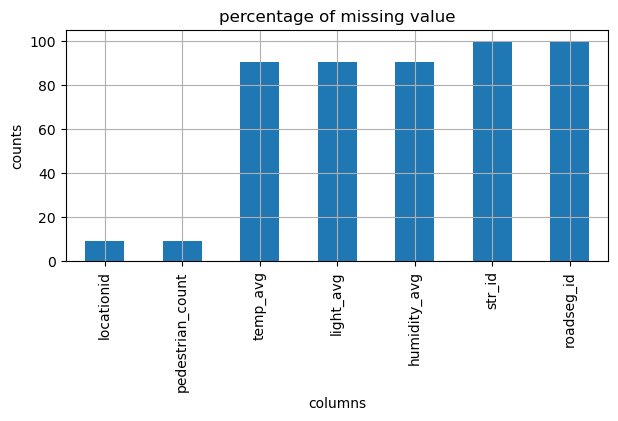

In [36]:
plt.figure(figsize=(7,3))
new_par = missing_percent[missing_percent >= 5].plot.bar()
plt.gca().set_xlabel("columns")
plt.gca().set_ylabel("counts")
plt.gca().set_title("percentage of missing value")
plt.grid()
plt.show()

After merging the three datasets together.It resulted to a lot of nan for some of my important column which i believe is not good for my analysis so i decided to treat the datasets one after the other to derive different insight and pattern. before generating a certain amount of samples for clustering and decision making

### making some analysis from each datasets
### trying to •	Visualize the pedestrian count data over time to identify patterns and peaks in pedestrian activity.

In [50]:
## from pedestrian dataset 
ped_df.head()

,locationid,location,timestamp,pedestrian_count,latitude,longitude,date,hourly,days_of_week
0,75,"-37.81515276, 144.97467661",2023-04-24 21:00:00+00:00,1,-37.815153,144.974677,2023-04-24,2023-04-24 21:00:00+00:00,Monday
1,75,"-37.81515276, 144.97467661",2023-04-25 00:00:00+00:00,1,-37.815153,144.974677,2023-04-25,2023-04-25 00:00:00+00:00,Tuesday
2,75,"-37.81515276, 144.97467661",2023-04-25 01:00:00+00:00,1,-37.815153,144.974677,2023-04-25,2023-04-25 01:00:00+00:00,Tuesday
3,75,"-37.81515276, 144.97467661",2023-04-25 02:00:00+00:00,1,-37.815153,144.974677,2023-04-25,2023-04-25 02:00:00+00:00,Tuesday
4,75,"-37.81515276, 144.97467661",2023-04-25 08:00:00+00:00,1,-37.815153,144.974677,2023-04-25,2023-04-25 08:00:00+00:00,Tuesday


In [51]:
ped_df['timestamp'] = pd.to_datetime(ped_df['timestamp'])


In [52]:

ped_df.head()

,locationid,location,timestamp,pedestrian_count,latitude,longitude,date,hourly,days_of_week
0,75,"-37.81515276, 144.97467661",2023-04-24 21:00:00+00:00,1,-37.815153,144.974677,2023-04-24,2023-04-24 21:00:00+00:00,Monday
1,75,"-37.81515276, 144.97467661",2023-04-25 00:00:00+00:00,1,-37.815153,144.974677,2023-04-25,2023-04-25 00:00:00+00:00,Tuesday
2,75,"-37.81515276, 144.97467661",2023-04-25 01:00:00+00:00,1,-37.815153,144.974677,2023-04-25,2023-04-25 01:00:00+00:00,Tuesday
3,75,"-37.81515276, 144.97467661",2023-04-25 02:00:00+00:00,1,-37.815153,144.974677,2023-04-25,2023-04-25 02:00:00+00:00,Tuesday
4,75,"-37.81515276, 144.97467661",2023-04-25 08:00:00+00:00,1,-37.815153,144.974677,2023-04-25,2023-04-25 08:00:00+00:00,Tuesday


In [53]:
ped_df['date'] =ped_df['timestamp'].dt.date
#ped_daily = ped_df.groupby('date')['pedestrian_count'].sum()

In [54]:
ped_df['hourly'] = ped_df['timestamp'].dt.floor('H')

In [55]:
ped_daily = ped_df.groupby('date',as_index=False)['pedestrian_count'].sum()

In [56]:
ped_hourly = ped_df.groupby('hourly',as_index=False)['pedestrian_count'].sum()

In [57]:
ped_hourly

,hourly,pedestrian_count
0,2023-03-31 13:00:00+00:00,71
1,2023-03-31 14:00:00+00:00,69
2,2023-03-31 15:00:00+00:00,68
3,2023-03-31 16:00:00+00:00,63
4,2023-03-31 17:00:00+00:00,64
...,...,...
7510,2024-03-18 10:00:00+00:00,81
7511,2024-03-18 11:00:00+00:00,80
7512,2024-03-18 12:00:00+00:00,79
7513,2024-03-18 13:00:00+00:00,78


In [58]:
ped_daily


,date,pedestrian_count
0,2023-03-31,751
1,2023-04-01,1592
2,2023-04-02,1651
3,2023-04-03,1681
4,2023-04-04,1665
...,...,...
341,2024-03-14,1930
342,2024-03-15,1935
343,2024-03-16,1945
344,2024-03-17,1904


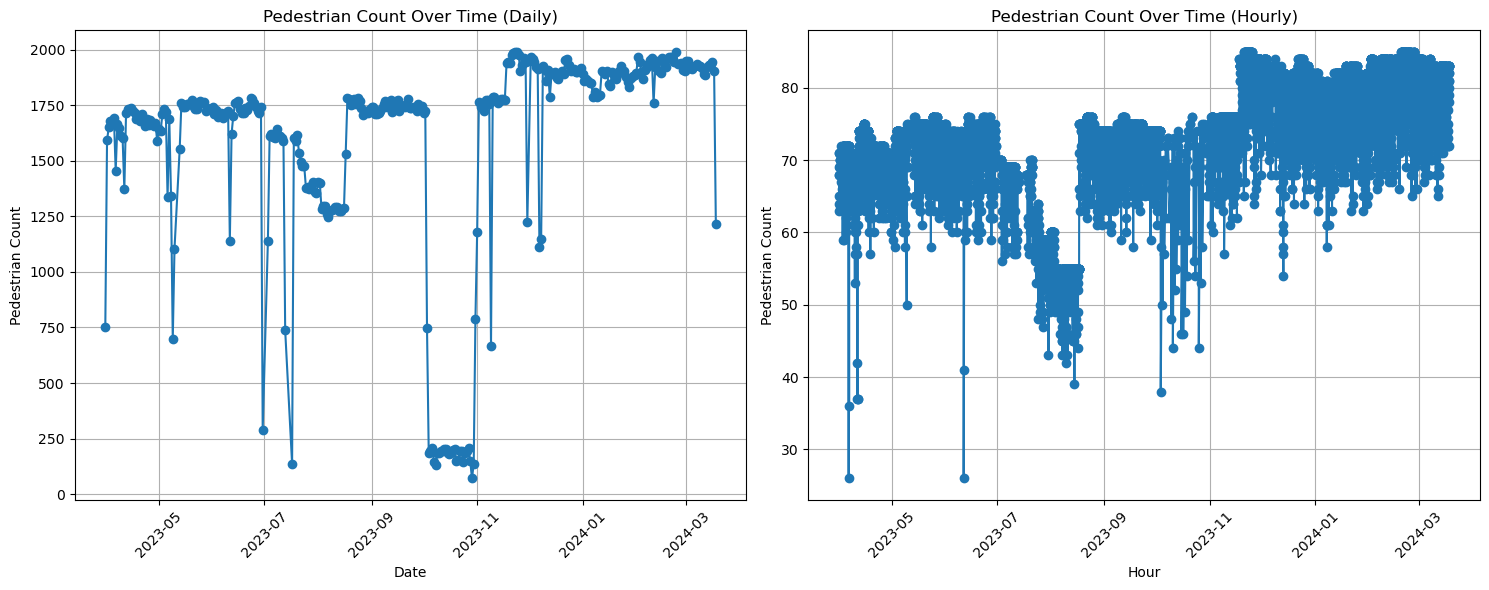

In [59]:
plt.figure(figsize=(15,6))

# Subplot 1: Pedestrian counts over time (daily)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(ped_daily['date'], ped_daily['pedestrian_count'], marker="o", linestyle="-")
plt.title('Pedestrian Count Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.xticks(rotation=45)

# Ensuring tight layout for the first subplot
plt.tight_layout()

# Subplot 2: Pedestrian counts over time (hourly)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(ped_hourly['hourly'], ped_hourly['pedestrian_count'], marker='o', linestyle="-")
plt.title('Pedestrian Count Over Time (Hourly)')
plt.xlabel('Hour')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.xticks(rotation=45)

# Ensuring tight layout takes into account the second subplot as well
plt.tight_layout()

# Display the figure with both subplots
plt.show()


Peak Activity: A notable pattern observed in the data is the occurrence of days with significantly high pedestrian counts, ranging between 1750 and 2000. These peaks suggest periods of increased pedestrian activity that could be attributed to specific factors such as weekday rush hours, public events, or favorable weather conditions.

Low Activity: Conversely, the data also revealed days with markedly low pedestrian counts, approximately around 250. These troughs in pedestrian activity may indicate periods of reduced foot traffic, possibly due to adverse weather conditions, weekdays with no significant events, or other deterrents to outdoor activity.

In [60]:
ped_df['days_of_week'] = ped_df['timestamp'].dt.day_name()

In [61]:
count_by_day = ped_df.groupby('days_of_week',as_index=False)['pedestrian_count'].sum()

***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```